In [1]:
# Importando os módulos de manipulação de dados
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print('Pronto!')

Pronto!


## Carregando os dados

In [2]:
user_reviews = pd.read_csv('user_reviews.csv')

In [3]:
user_reviews.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [4]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   grade      2999 non-null   int64 
 1   user_name  2999 non-null   object
 2   text       2999 non-null   object
 3   date       2999 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.8+ KB


In [5]:
# Criando novas features chamada 'text length' e 'punct%'
user_reviews['text length'] = user_reviews['text'].apply(len)

In [ ]:
# Definindo a função que cálcula a % de pontuação
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

user_reviews['punct%'] = user_reviews['text'].apply(lambda x: count_punct(x))

In [6]:
user_reviews.head()

,grade,user_name,text,date,text length
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,381
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,927
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,1000
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20,277
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,979


In [7]:
# Vamos visualizar o resumo estatístico
user_reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
grade,2999.0,4.217406,4.349486,0.0,0.0,2.0,10.0,10.0
text length,2999.0,665.030010,712.653434,18.0,169.0,322.0,990.0,5358.0


## Visualizações dos dados

In [8]:
# Importando mais alguns módulos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('Pronto!')

Pronto!


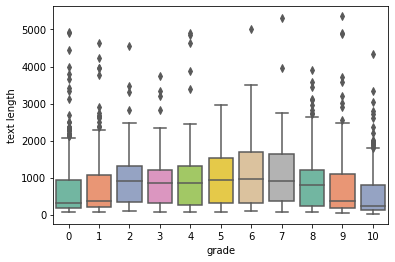

In [9]:
sns.boxplot(x='grade',y='text length',data=user_reviews,palette='Set2')

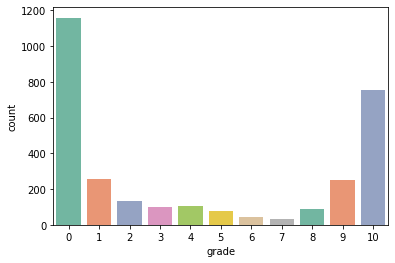

In [10]:
sns.countplot(x='grade',data=user_reviews,palette='Set2')

Text(0.5, 0, 'Count')

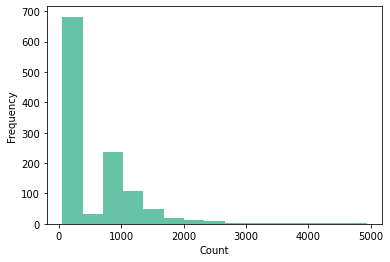

In [11]:
user_reviews[user_reviews['grade'] == 0]['text length'].plot(kind='hist',colormap='Set2',bins=15)
plt.xlabel('Count')

Text(0.5, 0, 'Count')

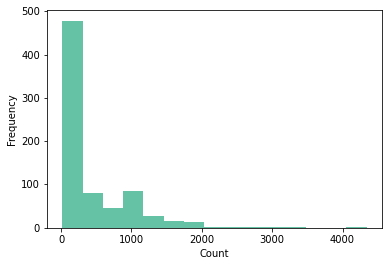

In [12]:
user_reviews[user_reviews['grade'] == 10]['text length'].plot(kind='hist',colormap='Set2',bins=15)
plt.xlabel('Count')

## Carregando os módulos para o NLP

In [13]:
import nltk
import re
import string

print('Pronto!')

Pronto!


In [14]:
# Instância para remover as pontuações
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
# Instância para realizar o stemm
ps = nltk.PorterStemmer()

In [16]:
# Definindo uma função que ira limpar o texto
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [17]:
user_reviews_grade = user_reviews[(user_reviews['grade'] == 0) | (user_reviews['grade'] == 10)]

In [18]:
X = user_reviews_grade['text']
y = user_reviews_grade['grade']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

## Separando os dados de treino e os dados de teste

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Importando os módulos para utilizar junto ao pipeline

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
from sklearn.pipeline import Pipeline

### Criando o pipeline

In [25]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

### Treinando o modelo

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7f8f71393b00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Realizando as predições

In [27]:
predictions = pipeline.predict(X_test)

### Avaliando o modelo

In [28]:
from sklearn import metrics

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       268
          10       0.73      0.95      0.83       114

    accuracy                           0.88       382
   macro avg       0.85      0.90      0.87       382
weighted avg       0.90      0.88      0.89       382



In [31]:
score = metrics.accuracy_score(y_test, predictions)
print('A acúracia do modelo foi de: %.3f'%score)

A acúracia do nosso modelo foi de: 0.882


### Salvando o modelo

In [1]:
import joblib

In [2]:
filename = 'NB_model.sav'

In [ ]:
joblib.dump(pipeline, filename)